# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
# Variable and dataframes for ease of coding:

# Create the Urban, suburban, and rural DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [4]:
#  1. Get the total rides for each city type

urban_ride_count = urban_cities_df["ride_id"].count()
suburban_ride_count = suburban_cities_df["ride_id"].count()
rural_ride_count = rural_cities_df["ride_id"].count()

ride_count_per_type = pyber_data_df.groupby(["type"]).count()["ride_id"]

In [5]:
# 2. Get the total drivers for each city type

urban_driver_count = urban_cities_df["driver_count"].sum()
suburban_driver_count = suburban_cities_df["driver_count"].sum()
rural_driver_count = rural_cities_df["driver_count"].sum()

drivers_per_type = city_data_df.groupby(["type"]).sum()["driver_count"]
drivers_per_type


type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [6]:
#  3. Get the total amount of fares for each city type

urban_fare = urban_cities_df["fare"].sum()
suburban_fare = suburban_cities_df["fare"].sum()
rural_fare = rural_cities_df["fare"].sum()

total_fare_per_type = pyber_data_df.groupby(["type"]).sum()["fare"]

In [7]:
#  4. Get the average fare per ride for each city type. 

urban_avg_fare = urban_cities_df["fare"].mean()
suburban_avg_fare = suburban_cities_df["fare"].mean()
rural_avg_fare = rural_cities_df["fare"].mean()

avg_fare_per_type = pyber_data_df.groupby(["type"]).mean()["fare"]

In [8]:
# 5. Get the average fare per driver for each city type. 

avg_urban_driver_fare = urban_fare / urban_driver_count 
avg_suburban_driver_fare = suburban_fare / suburban_driver_count
avg_rural_driver_fare = rural_fare / rural_driver_count

avg_fare_per_driver_per_type = total_fare_per_type / drivers_per_type

In [9]:
#  6. Create a PyBer summary DataFrame. 

PyBer_Summary_df = pd.DataFrame({
    "Total Rides per City Type" : ride_count_per_type,
    "Total Drivers per City Type" : drivers_per_type,
    "Total Fares per City Type" : total_fare_per_type,
    "Average Fare per Ride per City Type" : avg_fare_per_type,
    "Average Fare per Driver per City Type" : avg_fare_per_driver_per_type})
PyBer_Summary_df

,Total Rides per City Type,Total Drivers per City Type,Total Fares per City Type,Average Fare per Ride per City Type,Average Fare per Driver per City Type
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  7. Cleaning up the DataFrame. Delete the index name
PyBer_Summary_df.index.name = None

In [11]:
#  8. Format the columns.

# .map("${:, .2f}".format) for $
# .map("{:,}".format) for 1,000,000
# .map("{:, .1f}".format) for %

PyBer_Summary_df["Total Rides per City Type"] = PyBer_Summary_df["Total Rides per City Type"].map("{:,}".format)

PyBer_Summary_df["Total Drivers per City Type"] = PyBer_Summary_df["Total Drivers per City Type"].map("{:,}".format)

PyBer_Summary_df["Total Fares per City Type"] = PyBer_Summary_df["Total Fares per City Type"].map("${:,.2f}".format)

PyBer_Summary_df["Average Fare per Ride per City Type"] = PyBer_Summary_df["Average Fare per Ride per City Type"].map("${:,.2f}".format)

PyBer_Summary_df["Average Fare per Driver per City Type"] = PyBer_Summary_df["Average Fare per Driver per City Type"].map("${:,.2f}".format)

PyBer_Summary_df

,Total Rides per City Type,Total Drivers per City Type,Total Fares per City Type,Average Fare per Ride per City Type,Average Fare per Driver per City Type
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [12]:
#More or less the same as above, just group by type and date.

In [13]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [14]:
#I used the loc method early because I was unable to call the ['date'], after I pivotted the df.

pyber_data_df['date'] = pd.to_datetime(pyber_data_df['date'])

Pyber_Dates_Bool = (pyber_data_df['date'] >= '2019-01-01') & (pyber_data_df['date'] <= '2019-04-28')

Pyber_Limited_Dates = pyber_data_df.loc[Pyber_Dates_Bool]

In [15]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

Pyber_Time_Data = Pyber_Limited_Dates.groupby(['date', 'type']).sum()
Pyber_Time_Data.head(10)

,,fare,ride_id,driver_count
date,type,,,
2019-01-01 00:08:16,Urban,37.91,5673666505216,69
2019-01-01 00:46:46,Suburban,47.74,2215912677020,23
2019-01-01 02:07:24,Suburban,24.07,7827431948090,10
2019-01-01 03:46:50,Urban,7.57,5815378003370,64
2019-01-01 05:23:21,Urban,10.75,6571513080673,28
2019-01-01 09:45:36,Rural,43.69,2424875833354,1
2019-01-01 12:32:48,Suburban,25.56,2613536554411,1
2019-01-01 14:40:14,Urban,5.42,5676167585855,46
2019-01-01 14:42:25,Urban,12.31,4757042711529,45


In [16]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
Pyber_Time_Data = Pyber_Time_Data.reset_index()


In [17]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
Pyber_Time_Pivot = Pyber_Time_Data.pivot(index= "date", columns= "type", values="fare")
Pyber_Time_Pivot.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [18]:
#Check that the index is datetime
Pyber_Time_Pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [19]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

Resampled_Time = Pyber_Time_Pivot.resample("W").sum()
Resampled_Time.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


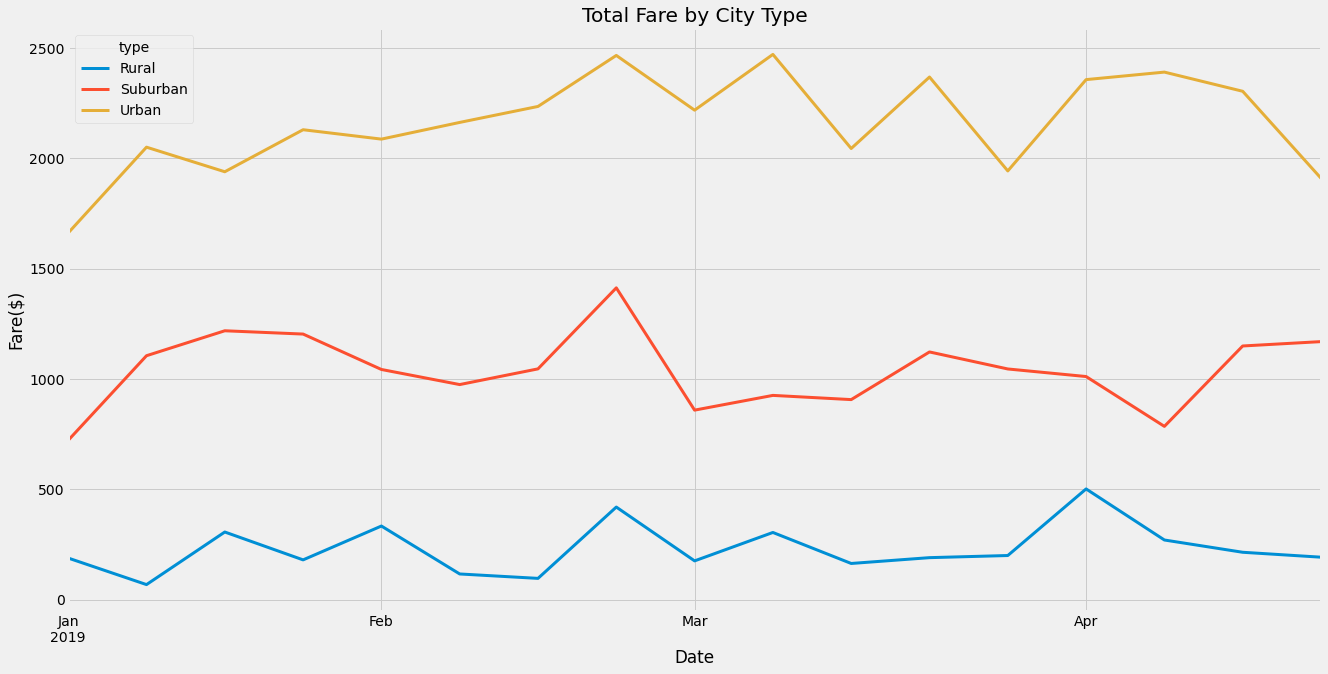

<Figure size 432x288 with 0 Axes>

In [106]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
# Use the graph style fivethirtyeight.
#style.use('fivethirtyeight')

# Build percentage of rides by city type pie chart.

Resampled_Time.plot(style.use('fivethirtyeight'), linewidth=3, figsize= (20, 10))
plt.title("Total Fare by City Type")
plt.ylim = (0, 2500)
plt.ylabel("Fare($)")
plt.xlabel("Date")
plt.rcParams['font.size'] = 14

plt.show()

plt.savefig("Analysis/Fig9.png")